***Import Libraries***

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import warnings 
warnings.simplefilter("ignore")

ModuleNotFoundError: No module named 'cv2'

In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 38.2/38.2 MB 568.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-build-tracker-tgak1n5z\\0e8b06bf711e4f2f6af9b2a579eac23a186248220bf40acce11c2674'



## Import data

In [2]:
DATADIR=r'C:\Users\Saurabh Kumar\Desktop\Project\Project_new\CK+48'

In [3]:
CATEGORIES = os.listdir(DATADIR)  # list of directory
CATEGORIES

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [4]:
def load_data():
    DATADIR = r'C:\Users\Saurabh Kumar\Desktop\Project\Project_new\CK+48'
    data = []
    # loading training data
    for category in CATEGORIES:
        # create path to image of respective expression
        path = os.path.join(DATADIR, category)
        # get the classification  for each expression 
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), 0)
            data.append([img_array, class_num])
            
    return data

In [5]:
data = load_data()
len(data)

100%|██████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 1333.80it/s]


982

## Lets Visualize some images

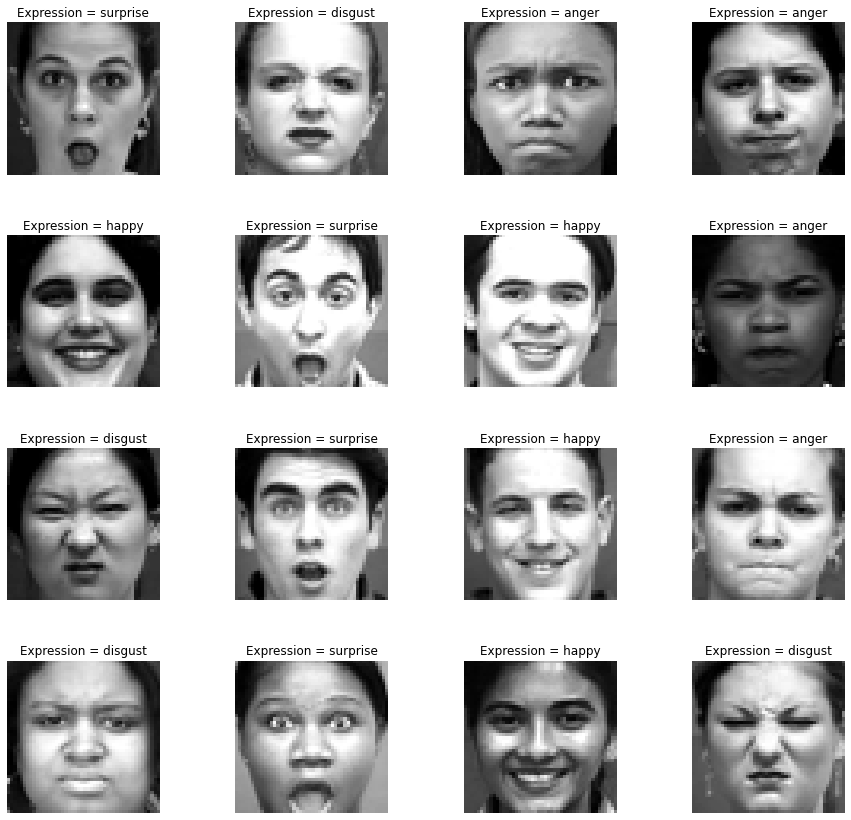

In [6]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in range(0, L * W):  
    sample = random.choice(data)
    axes[i].set_title("Expression = "+str(CATEGORIES[sample[1]]))
    axes[i].imshow(sample[0], cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

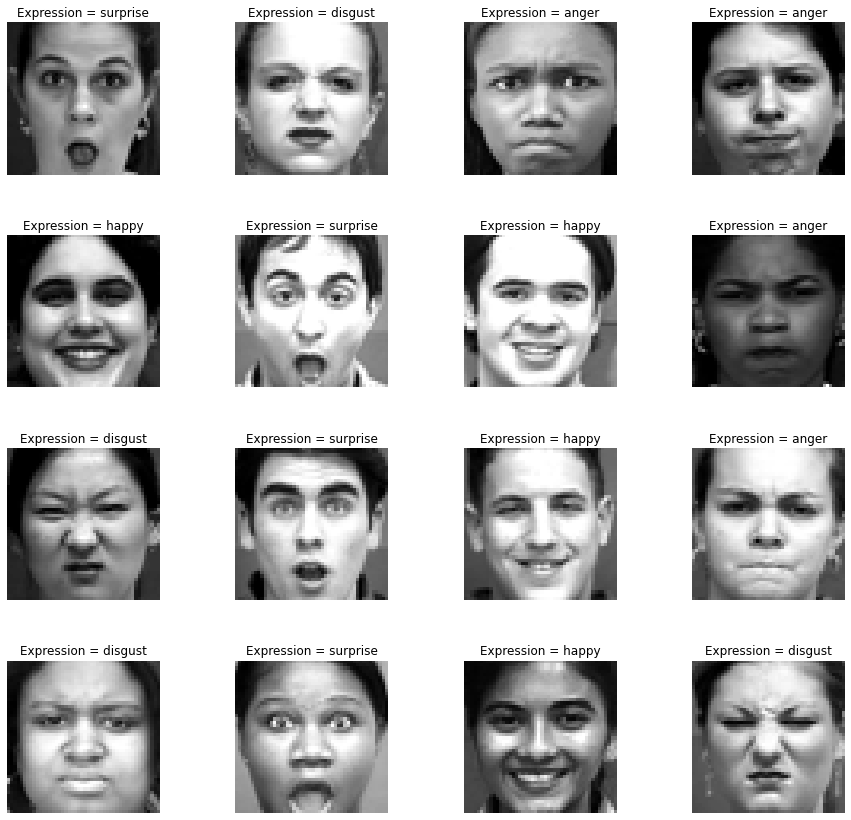

In [ ]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in range(0, L * W):  
    sample = random.choice(data)
    axes[i].set_title("Expression = "+str(CATEGORIES[sample[1]]))
    axes[i].imshow(sample[0], cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## Creating training and testing data

In [7]:
X = np.array([x[0] for x in data])
y = np.array([Y[1] for Y in data])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [9]:
#X contains the image
#y contains the emotions
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("-------------------------------")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (785,)
y_train shape:  (785,)
-------------------------------
X_test shape:  (197,)
y_test shape:  (197,)


In [10]:
X_train

array([array([[19, 17, 16, ..., 48, 70, 88],
              [21, 21, 15, ..., 54, 74, 98],
              [25, 28, 24, ..., 63, 69, 97],
              ...,
              [15, 13,  4, ..., 96, 94, 92],
              [18, 12,  8, ..., 95, 92, 91],
              [19, 14,  8, ..., 81, 90, 89]], dtype=uint8),
       array([[ 38,  28,  30, ...,  63,  90, 116],
              [ 42,  31,  31, ...,  80,  76,  88],
              [ 28,  27,  39, ..., 110, 107, 101],
              ...,
              [ 58,  52,  35, ...,  82,  80,  80],
              [ 66,  44,  70, ...,  85,  83,  81],
              [ 79,  96, 131, ...,  97,  85,  82]], dtype=uint8),
       array([[ 84,  85,  70, ..., 111, 111, 109],
              [ 85,  85,  67, ..., 111, 111, 110],
              [ 86,  88,  58, ..., 112, 111, 111],
              ...,
              [ 68,  68,  70, ...,  92,  91,  92],
              [ 68,  68,  70, ..., 100,  90,  90],
              [ 66,  63,  60, ..., 139, 132, 100]], dtype=uint8),
       array([[ 

In [11]:
y_train

array([4, 2, 6, 4, 2, 6, 6, 4, 0, 0, 6, 2, 6, 4, 6, 6, 4, 2, 0, 2, 0, 2,
       6, 0, 6, 2, 6, 3, 5, 3, 0, 0, 3, 6, 5, 2, 6, 0, 0, 2, 6, 5, 4, 0,
       4, 2, 2, 5, 6, 4, 4, 6, 0, 0, 0, 5, 2, 4, 4, 4, 0, 4, 2, 4, 5, 2,
       4, 0, 2, 4, 5, 2, 3, 2, 5, 2, 3, 2, 6, 2, 6, 4, 6, 4, 4, 6, 2, 0,
       1, 4, 5, 4, 4, 6, 4, 2, 4, 6, 6, 4, 6, 4, 3, 4, 2, 6, 5, 2, 0, 1,
       2, 2, 4, 6, 4, 2, 0, 4, 2, 4, 3, 0, 2, 5, 4, 2, 4, 4, 2, 1, 0, 3,
       6, 6, 0, 6, 1, 2, 6, 0, 2, 0, 2, 3, 2, 1, 3, 4, 0, 6, 1, 0, 4, 2,
       3, 4, 1, 4, 1, 1, 0, 6, 6, 0, 5, 5, 2, 1, 6, 2, 2, 6, 4, 0, 6, 6,
       1, 0, 4, 0, 4, 0, 6, 3, 6, 6, 0, 6, 4, 5, 5, 6, 2, 0, 4, 4, 6, 6,
       2, 4, 5, 4, 4, 3, 0, 5, 6, 6, 5, 3, 0, 0, 6, 2, 2, 2, 2, 4, 2, 0,
       1, 3, 5, 4, 2, 6, 5, 4, 6, 6, 6, 1, 5, 4, 6, 4, 6, 1, 2, 4, 6, 6,
       3, 3, 0, 0, 6, 4, 3, 0, 0, 3, 4, 3, 0, 6, 0, 2, 6, 6, 6, 4, 4, 4,
       0, 0, 3, 4, 0, 0, 2, 1, 4, 6, 4, 6, 0, 3, 1, 4, 3, 4, 6, 6, 1, 3,
       5, 6, 6, 5, 3, 6, 2, 4, 2, 4, 0, 0, 6, 4, 2,

In [12]:
# reshaping y_train and y_test
# reshaping only the emotions
y_train = np.reshape(y_train, (len(y_train),1))
y_test  = np.reshape(y_test , (len(y_test ),1))

print("After reshaping")
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

After reshaping
y_train shape:  (785, 1)
y_test shape:  (197, 1)


In [13]:
X_train_Gabor  = X_train
X_test_Gabor = X_test

In [14]:
print(X_train.shape)
print(X_test.shape)

(785,)
(197,)


## Adding colour channel

In [15]:
#  X_train = np.expand_dims(X_train, axis=1)
#  X_test = np.expand_dims(X_test, axis=1)

#  print("After adding color channel")
#  print("X_train shape: ", X_train.shape)
#  print("X_test shape: ", X_test.shape)

## Normalizing pixel values

In [16]:
# X_train = X_train // 255.0
# X_test = X_test // 255.0

## Converting single values to category array

In [17]:
y_train[0]

array([4])

In [18]:
#Converts a class vector (integers) to binary class matrix
y_train_SVM = y_train
y_test_SVM = y_test

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [19]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
y_train.shape, y_test.shape

((785, 7), (197, 7))

## **Creat CNN Model**

In [21]:
def create_model(input_shape=None):
    if input_shape is None :
        input_shape=(48,48,1)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))
    
    return model 

In [22]:
es = EarlyStopping(
    monitor='val_accuracy', min_delta=0.0001, patience=10, verbose=2,
    mode='max', baseline=None, restore_best_weights=True
)
lr = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=2,
    mode='max', min_delta=1e-5, cooldown=0, min_lr=0
)

callbacks = [es, lr]

In [23]:
Model = create_model()
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        9280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(Model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## **Training Model**

In [ ]:
WFE_model = create_model()
WFE_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam' )

In [ ]:
WFE_history = WFE_model.fit(X_train, y_train, batch_size=8 , epochs=50, validation_data = (X_test, y_test) ,callbacks = [callbacks])

In [ ]:
def plot_performance(history):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')

    plt.legend()
    plt.grid()
    plt.title('train and val loss evolution')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')

    plt.legend()
    plt.grid()
    plt.title('train and val accuracy')

In [ ]:
plot_performance(WFE_history)

In [ ]:
acc = []

In [ ]:
WFE_acc = WFE_model.evaluate(X_test, y_test, verbose = 0)[1]
acc.append(WFE_acc)
print("Without Feature extraction Accuracy :", WFE_acc)

In [ ]:
WFE_model.save('WFE_model.h5')

# Training Model Using LBP Feature Extraction Technique

In [25]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3  
    print(im.shape[0])# taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
        for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values 
            img1_vector = np.delete(img1_vector,4)  
            digit = np.where(img1_vector)[0]         
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n<center assign 0
            else:                                    # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values
                                                    #of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

48


(-0.5, 47.5, 47.5, -0.5)

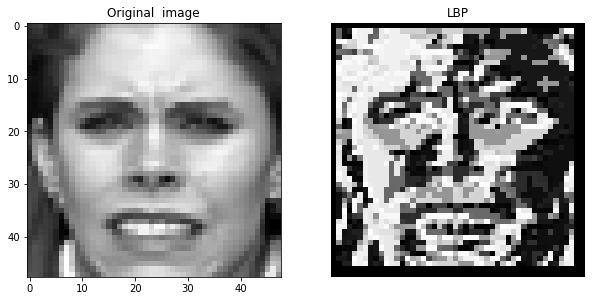

In [26]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
img = random.choice(X_train)
plt.title("Original  image")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("LBP")
imgLBP=Binarypattern(img)             # calling the LBP function using gray image
plt.imshow(imgLBP, cmap='gray')
plt.axis('off')

In [27]:
X_train.shape

(785,)

In [44]:
def create_LBP_features(data):
    Feature_data = np.zeros(data.shape)


    for i in range(len(data)):
        img = data[i]
        imgLBP=Binarypattern(img)  
        Feature_data[i] = imgLBP
    
    return Feature_data

In [41]:
Feature_X_train = create_LBP_features(X_train)

48


ValueError: setting an array element with a sequence.

In [42]:
Feature_X_train.shape

NameError: name 'Feature_X_train' is not defined

In [47]:
img = random.choice(Feature_X_train)
plt.imshow(img, cmap='gray')

NameError: name 'Feature_X_train' is not defined

In [ ]:
Feature_X_test = create_LBP_features(X_test)


In [ ]:
img = random.choice(Feature_X_test)
plt.imshow(img, cmap='gray')

In [ ]:
# Training And Testing LBP-CNN model

In [ ]:
LBP_model = create_model()
LBP_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam' )

In [ ]:
LBP_history = LBP_model.fit(Feature_X_train, y_train, batch_size=8 , epochs=50, validation_data = (Feature_X_test, y_test) ,callbacks = [callbacks])

In [ ]:
plot_performance(LBP_history)

In [ ]:
LBP_acc = LBP_model.evaluate(Feature_X_test, y_test, verbose = 0)[1]
acc.append(LBP_acc)
print("LBP Accuracy :",LBP_model.evaluate(Feature_X_test, y_test, verbose = 0)[1])

In [ ]:
LBP_model.save('LBP_model.h5')

# Training Model Using HOG Feature Extraction Technique

In [48]:
from skimage.transform import resize
from skimage.feature import hog

## How HOG looks

ValueError: Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.

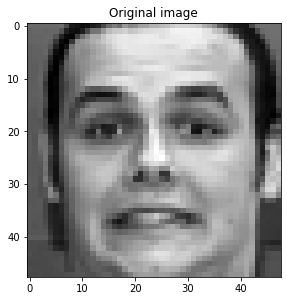

In [49]:
plt.figure(figsize=(10, 10))


plt.subplot(1,2,1)
img = random.choice(X_train)
# first image needs to be resized before passing it to HOG descriptor
resized_img =  resize(img, (128, 64))
plt.title("Original image")
plt.imshow(img, cmap='gray')
fd, hog_image = hog(
    resized_img, 
    orientations=9, 
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), 
    visualize=True, 
    multichannel=True
)
plt.subplot(1,2,2)
plt.title("HOG")
plt.imshow(resize(hog_image, (48, 48)), cmap='gray')
plt.axis('off')

ValueError: Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.

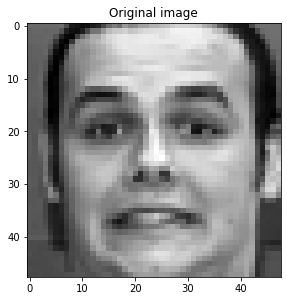

In [ ]:
plt.figure(figsize=(10, 10))


plt.subplot(1,2,1)
img = random.choice(X_train)
# first image needs to be resized before passing it to HOG descriptor
resized_img =  resize(img, (128, 64))
plt.title("Original image")
plt.imshow(img, cmap='gray')
fd, hog_image = hog(
    resized_img, 
    orientations=9, 
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), 
    visualize=True, 
    multichannel=True
)
plt.subplot(1,2,2)
plt.title("HOG")
plt.imshow(resize(hog_image, (48, 48)), cmap='gray')
plt.axis('off')

## Creating Feature Vectors For training and testing

In [ ]:
def Create_Hog_features(data):
    Feature_data = np.zeros((len(data),48,48))

    for i in range(len(data)):
        img = data[i]
        resized_img = resize(img, (128, 64))
        fd, hog_image = hog(
            resized_img, 
            orientations=9, 
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2), 
            visualize=True, 
            multichannel=True
        )
        Feature_data[i] = resize(hog_image, (48, 48))
    return Feature_data

In [ ]:
Feature_X_train = Create_Hog_features(X_train)
Feature_X_train.shape

In [ ]:
plt.imshow(random.choice(Feature_X_train), cmap='gray')
plt.axis('off')

In [ ]:
# doing same for test data 
Feature_X_test = Create_Hog_features(X_test)

Feature_X_test.shape

In [ ]:
plt.imshow(random.choice(Feature_X_test), cmap='gray')
plt.axis('off')

In [ ]:
# Again adding color channel as it got removed while converting img to hog img
X_train_HOG = np.expand_dims(Feature_X_train, axis=3)
X_test_HOG = np.expand_dims(Feature_X_test, axis=3)

print("After adding color channel")
print("X_train_HOG shape: ", X_train_HOG.shape)
print("X_test_HOG shape: ", X_test_HOG.shape)

In [ ]:
print("X_train_HOG shape: ", X_train_HOG.shape)
print("y_train shape: ", y_train.shape)
print("X_test_HOG shape: ", X_test_HOG.shape)
print("y_test shape: ", y_test.shape)

In [ ]:
# train_datagen = ImageDataGenerator(
#     rotation_range=25, width_shift_range=0.1,
#     height_shift_range=0.1, shear_range=0.2, 
#     zoom_range=0.2,horizontal_flip=True, 
#     fill_mode="nearest"
# )

## Training and Testing the Hog - CNN model

In [ ]:
HOG_model = create_model()

In [ ]:
HOG_model.summary()

In [ ]:
HOG_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam' )

In [ ]:
HOG_history = HOG_model.fit(X_train_HOG, y_train, batch_size=8 , epochs=50, validation_data = (X_test_HOG, y_test), callbacks = [callbacks])

In [ ]:
plot_performance(HOG_history)

In [ ]:
HOG_acc = HOG_model.evaluate(X_test_HOG, y_test, verbose = 0)[1]
acc.append(HOG_acc)
print("HOG Accuracy :",HOG_model.evaluate(X_test_HOG, y_test, verbose = 0)[1])

In [ ]:
HOG_acc = HOG_model.evaluate(X_test_HOG, y_test, verbose = 0)[1]
acc.append(HOG_acc)
print("HOG Accuracy :",HOG_model.evaluate(X_test_HOG, y_test, verbose = 0)[1])

In [ ]:
HOG_model.save('HOG_model.h5')

In [ ]:
print(acc)